In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
df=pd.read_csv("gurgaon_properties_cleaned_v2.csv")

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,...,NaN,477.0,NaN,0,0,0,0,0,0,8
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,...,NaN,2250.0,NaN,0,0,0,0,0,0,30
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3+,...,2690.0,2350.0,2170.0,1,0,0,0,0,0,220
3,house,independent,sector 25,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 ...,12,12,3+,...,NaN,260.0,245.0,1,1,1,0,1,1,157
4,house,dlf city plots phase 3,sector 24,1.44,26667.0,540.0,Plot area 60(50.17 sq.m.),4,2,2,...,NaN,540.0,NaN,0,0,0,0,0,0,8


In [6]:
df.shape

(3803, 23)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [8]:
df.duplicated().sum()

126

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,...,NaN,477.0,NaN,0,0,0,0,0,0,8
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,...,NaN,2250.0,NaN,0,0,0,0,0,0,30
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3+,...,2690.0,2350.0,2170.0,1,0,0,0,0,0,220
3,house,independent,sector 25,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 ...,12,12,3+,...,NaN,260.0,245.0,1,1,1,0,1,1,157
4,house,dlf city plots phase 3,sector 24,1.44,26667.0,540.0,Plot area 60(50.17 sq.m.),4,2,2,...,NaN,540.0,NaN,0,0,0,0,0,0,8


### property_type    

<Axes: >

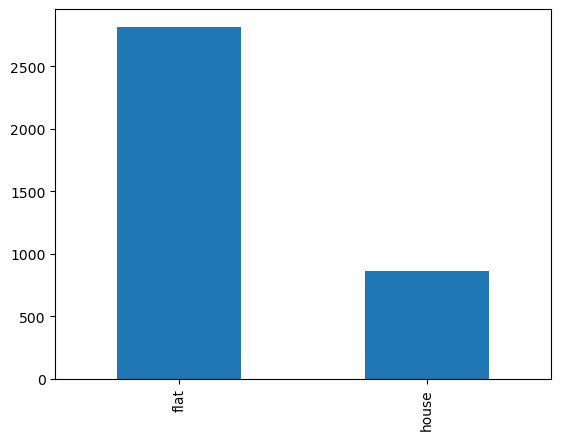

In [11]:
df['property_type'].value_counts().plot(kind='bar')

### Observation :
    * Flats are in majority(75%) and there are less number of houses(~25%)
    * No missing values

### society


In [12]:
# Its a categorical coloumn with more cardanility ie it has more categories (676)

df['society'].value_counts().shape

(676,)

In [13]:
df['society'].value_counts()

independent                             486
tulip violet                             75
ss the leaf                              73
dlf new town heights                     42
shapoorji pallonji joyville gurugram     42
                                       ... 
vatika iris floors                        1
kothi                                     1
huda                                      1
experion heartsong                        1
the nav manesar apartment                 1
Name: society, Length: 676, dtype: int64

In [14]:
df[df['society']!='independent']['society'].value_counts(normalize=True).cumsum().head(75)


# if we select the top 75 then 50% of the data comes from them ,so we have some categories where there are more flats and some are there where less flats are there

tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
umang winter hills                      0.490282
ramsons kshitij                         0.494357
ansal heights 86                        0.498433
central park flower valley              0.502194
mvn athens                              0.505956
Name: society, Length: 75, dtype: float64

In [15]:
society_counts=df['society'].value_counts()

# frequencies distribution for societies :

frequency_bin={
    "Very High(>100)":(society_counts>100).sum(),
    "High (50-100)":((society_counts>=50)& (society_counts<=100)).sum(),
    "Average(10-49)":((society_counts>=10)& (society_counts<50)).sum(),
    "Low(2-9)":((society_counts>=2)& (society_counts<10)).sum(),
    "Very Low(1)":(society_counts==1).sum()
}

frequency_bin

{'Very High(>100)': 1,
 'High (50-100)': 2,
 'Average(10-49)': 92,
 'Low(2-9)': 273,
 'Very Low(1)': 308}

<Axes: >

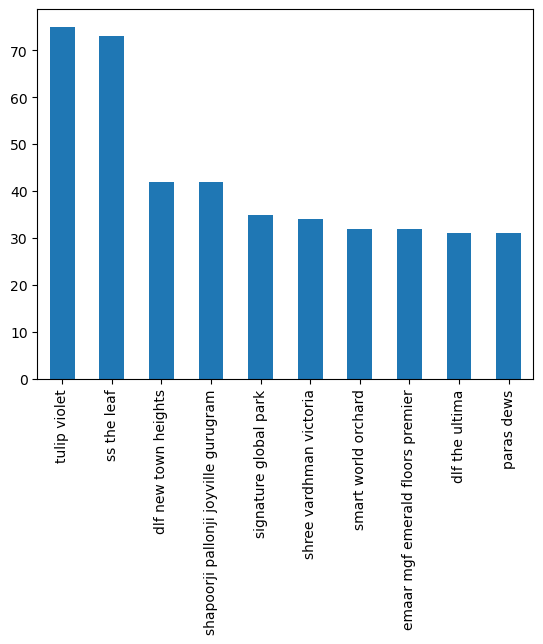

In [16]:
# top 10 societies :

df[df['society']!="independent"]['society'].value_counts().head(10).plot(kind='bar')

In [17]:
df['society'].isnull().sum()

1

In [18]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
470,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


### Observations :
    * Around 13% properties come under independent tag 
    * There are 675 society
    * The top 75 societis have 50% of properties and rest 50% of properties comes from the remainig 600 societies
        *Very High (>100): Only 1 society has more than 100 listings.
        *High (50-100): 2 societies have between 50 to 100 listings.
        *Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
        *Low (2-9): 273 societies have between 2 to 9 listings.
        *Very Low (1): A significant number, 308 societies, have only 1 listing.
    *1 missing value

### sector


In [19]:
# unique sectors 

df['sector'].value_counts().shape

(113,)

<Axes: >

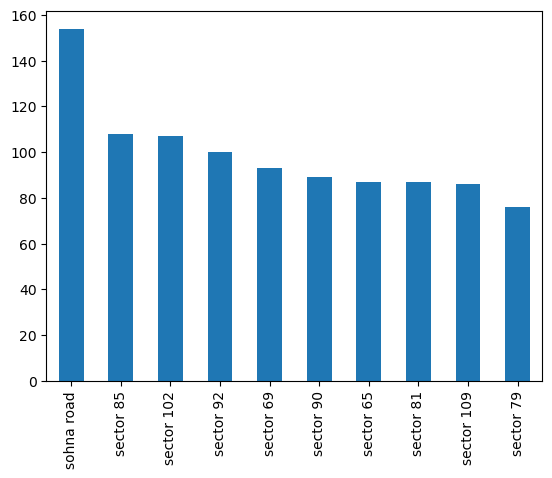

In [20]:
# top 10 sectors 

df['sector'].value_counts().head(10).plot(kind='bar')

In [21]:
sector_counts=df['sector'].value_counts()
sector_frequency_bins={
     "Very High(>100)":(sector_counts>100).sum(),
    "High (50-100)":((sector_counts>=50)& (sector_counts<=100)).sum(),
    "Average(10-49)":((sector_counts>=10)& (sector_counts<50)).sum(),
    "Low(2-9)":((sector_counts>=2)& (sector_counts<10)).sum(),
    "Very Low(1)":(sector_counts==1).sum()
}
sector_frequency_bins

{'Very High(>100)': 3,
 'High (50-100)': 25,
 'Average(10-49)': 63,
 'Low(2-9)': 21,
 'Very Low(1)': 1}

### Observations :
    *There are total 113 unique  sectors 
    *Frequency Distribution of sectors:
        *Very High (>100): 3 sectors have more than 100 listings.
        *High (50-100): 25 sectors have between 50 to 100 listings.
        *Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
        *Low (2-9):21 sectors have between 2 to 9 listings.
        *Very Low (1):  1
    

### Price 

In [22]:
df['price'].isnull().sum()

17

In [23]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

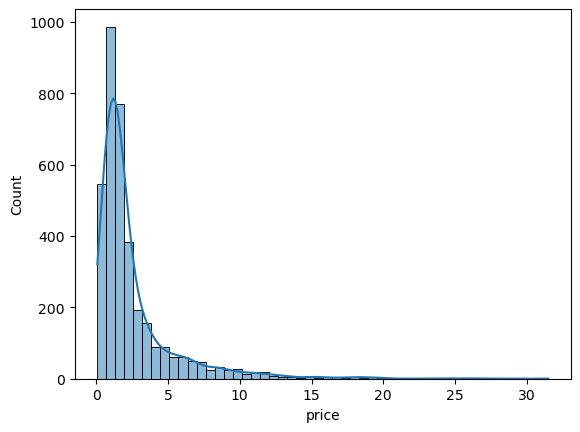

In [24]:
sns.histplot(df['price'],kde=True,bins=50)

# we can see that theres right skewness is there 

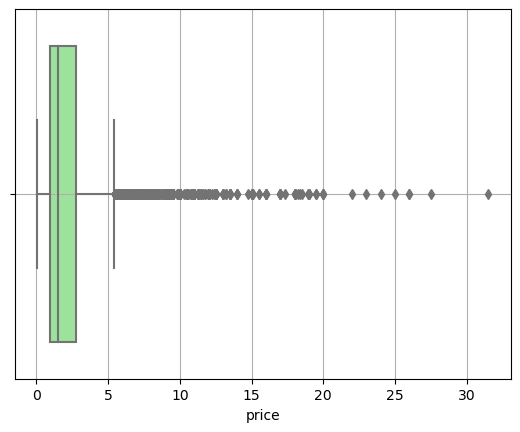

In [67]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

# whiskes is going around 5cr and beyond it considered as outlier 

#### Observations:
* Descriptive Statistics :
  * Count: There are 3,660 non-missing price entries.
  * Mean Price: The average price is approximately 2.53 crores
  * Median Price: The median (or 50th percentile) price is 1.52 crores.
  * Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices
  * Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
  * IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores
* Visualizations:
  * Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
  * Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
  * Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
* There are 17 missing values 

In [26]:
# skewness and kurtosis 

# skewness show how our data is skewed ie ek taraf juka hua hai 
# kurtosis shows heaviness in the tail ie hamare pass outliers kitne hai(more than 3 means outliers hai )


skewness=df['price'].skew()
kurtosis=df['price'].kurt()
print(skewness,kurtosis)

3.279170473313463 14.933372629214265


**Skewness:** The price distribution has a skewness of approximately 3.28, indicating a positive skew.This means the distribution tail is skewed to right,which aligns with our observations from the histogram where most properties have prices on lower end with a few high-prices properties 

**Kurtosis:** The kurtosis value is approximately 14.93.A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers as compared to a normal distribution



In [27]:
# Quantile Analysis :

quantiles=df['price'].quantile([0.01,0.05,0.95,0.99])
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

### Quantile Analysis :
* 1% Quantile: Only 1% of properties are priced below 0.25 crores.
* 5% Quantile: 5% of properties are priced below 0.37 crores.
* 95% Quantile: 95% of properties are priced below 8.5 crores.
* 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [28]:
# Identifying potential  outliers using IQR method :
Q1=df['price'].describe()['25%']
Q3=df['price'].describe()['75%']
IQR=Q3-Q1
IQR

1.8

In [29]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

print(lower_bound,upper_bound)

-1.7500000000000002 5.45


In [30]:
outliers=df[(df['price']<lower_bound) | (df['price']>upper_bound)]
outliers.shape

(425, 23)

In [31]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

### Outliers Analysis (Using IQR method):
 * Based on the IQR method, there are 425 properties considered as outliers.
 * These outliers have an average price of approximately 9.24 crores.
 * The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: >

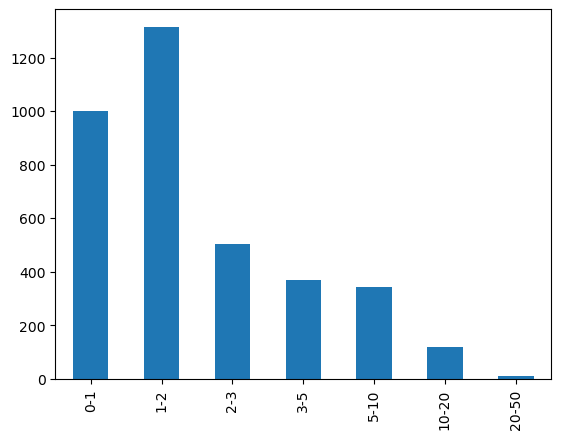

In [42]:
# price binning 
bins=[0,1,2,3,5,10,20,50]
bin_labels=["0-1","1-2","2-3","3-5","5-10","10-20","20-50"]
pd.cut(df['price'],bins=bins,labels=bin_labels,right=False).value_counts().sort_index().plot(kind="bar")
 

* The majority of properties are priced in the "1-2 crores" and "0-1 crores" ranges.
* There's a significant drop in the number of properties priced above "5 crores."

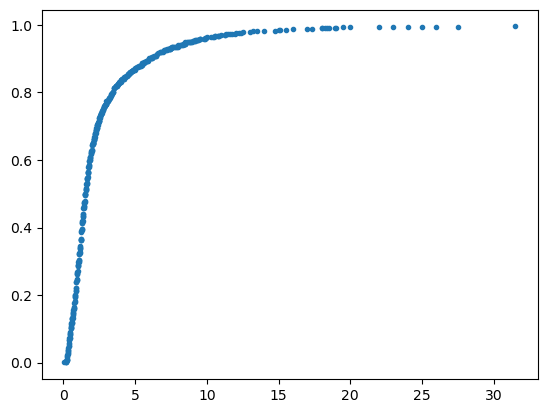

In [47]:
# ecdf plot :

ecdf=df['price'].value_counts().sort_index().cumsum()/len(df['price'])
plt.plot(ecdf.index,ecdf,marker='.',linestyle='none')

# go x=10 and see y value you get approx as say 0.95 which means 95% data less than 10cr

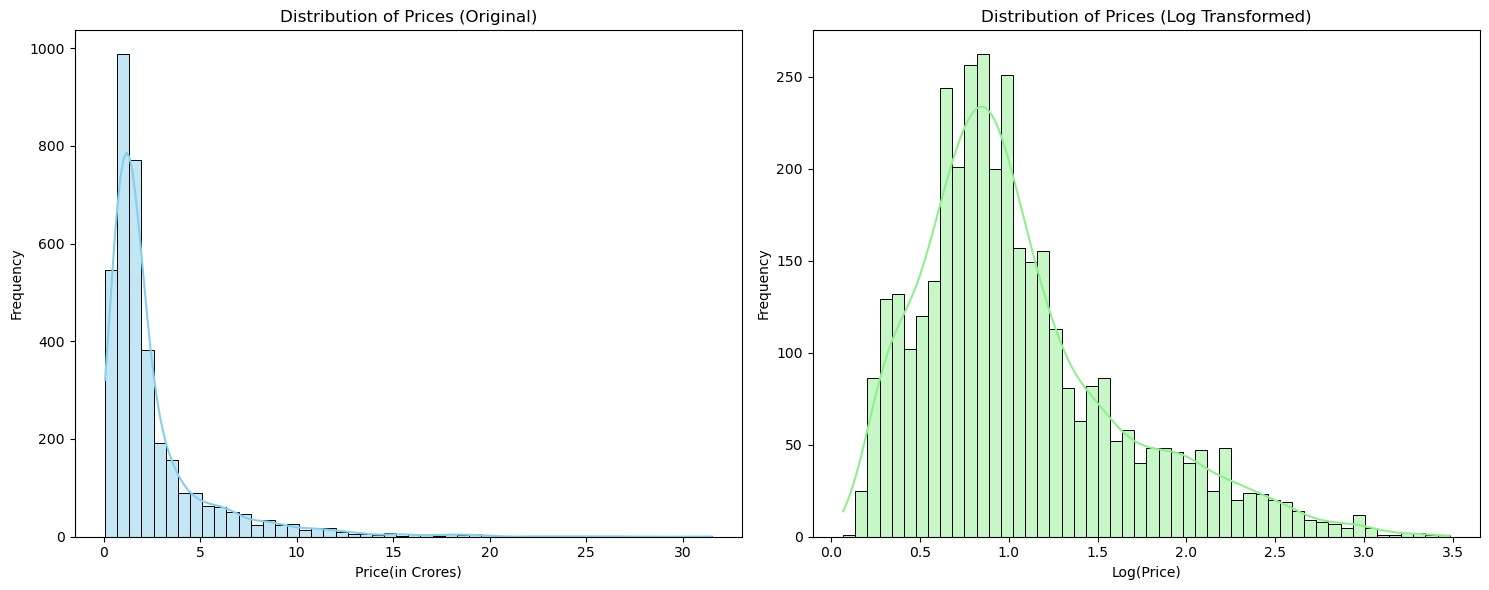

In [59]:
# now we have right skewed data so to convert it to normal distribution we do log transformation 

plt.figure(figsize=(15,6))

# Distribution without log transformation :

plt.subplot(1,2,1)
sns.histplot(df['price'],kde=True,bins=50,color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price(in Crores)')
plt.ylabel("Frequency")

# Distribution with log transformation :

plt.subplot(1,2,2)
sns.histplot(np.log1p(df['price']),kde=True,bins=50,color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


* np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

* Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [56]:
skewness=np.log1p(df['price']).skew()
kurtosis=np.log1p(df['price']).kurt()
print(skewness,kurtosis)

1.0740709565255313 0.9646692415449274


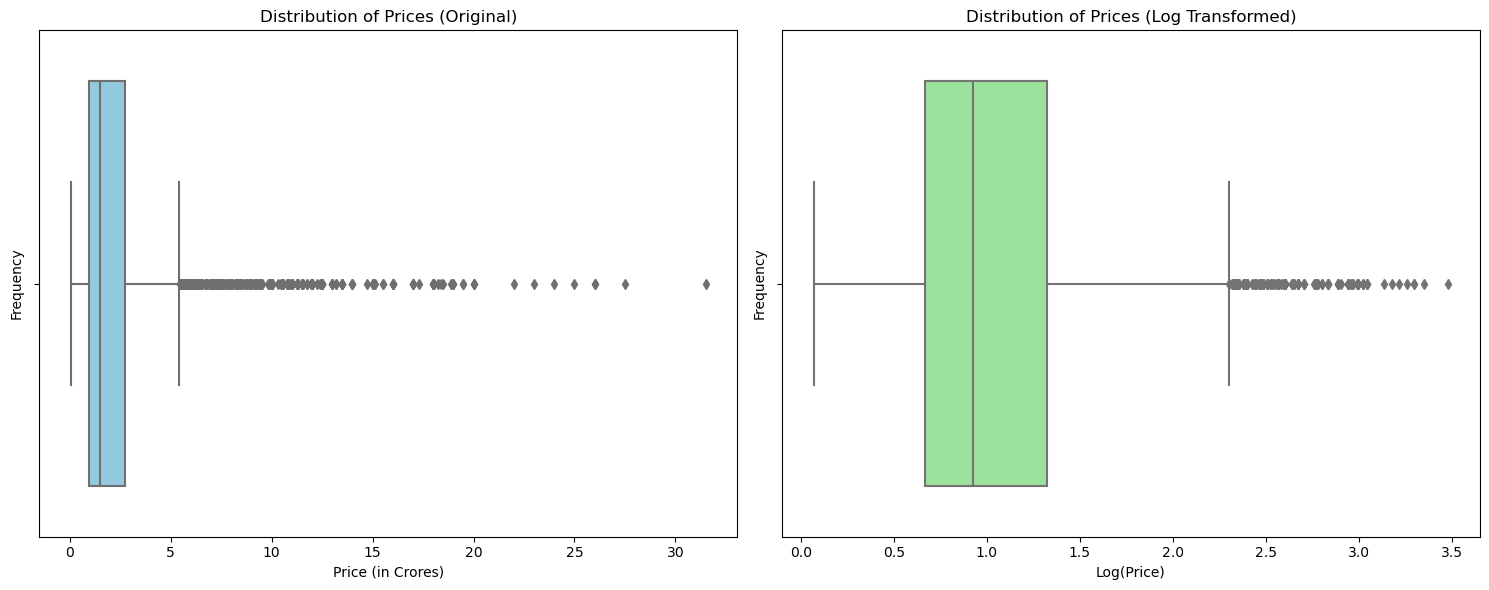

In [69]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



### price_per_sqft

In [63]:
df['price_per_sqft'].isnull().sum()

17

In [64]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

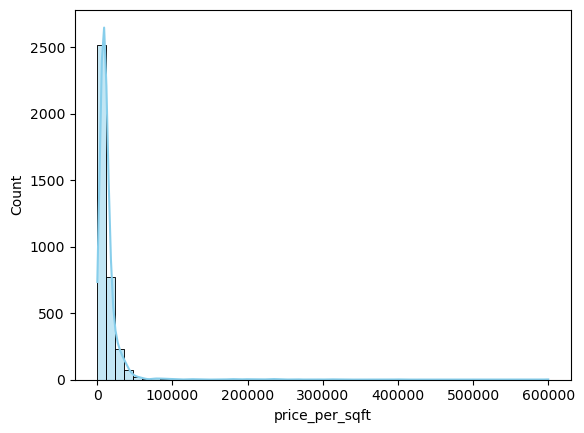

In [65]:
sns.histplot(df['price_per_sqft'],bins=50,color='skyblue',kde=True)
# right skewed data 

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.


<Axes: xlabel='price_per_sqft'>

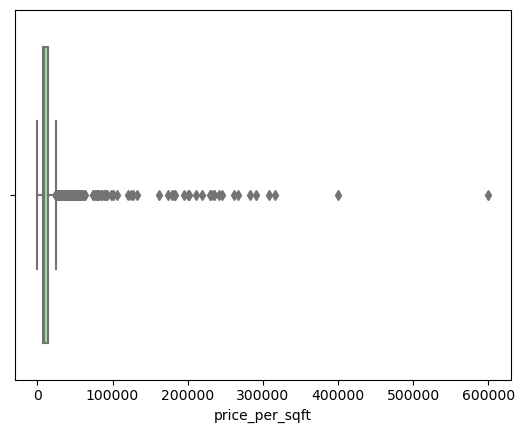

In [68]:
sns.boxplot(x=df['price_per_sqft'],color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

### Observations:
* Potential Outliers 
* Rigth Skewed 
* 17 missing values 


### 

### bedRoom

In [72]:
df['bedRoom'].isnull().sum()

0

<Axes: >

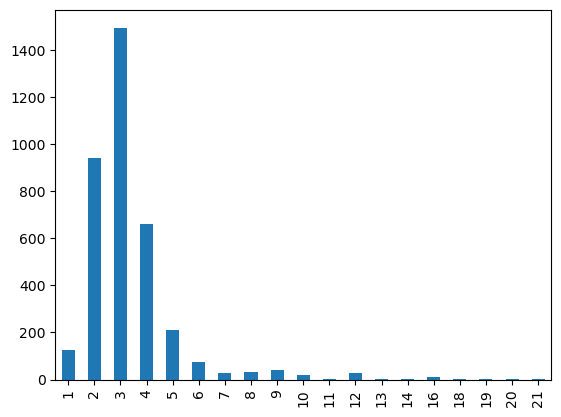

In [80]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

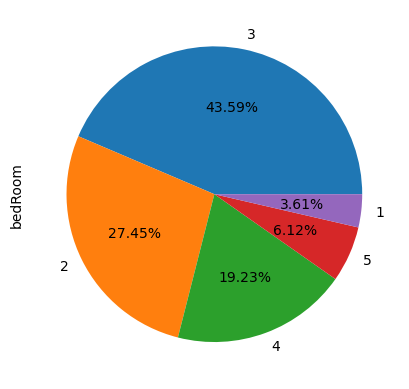

In [89]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct="%0.2f%%")

### bathroom

In [90]:
df['bathroom'].isnull().sum()

0

<Axes: >

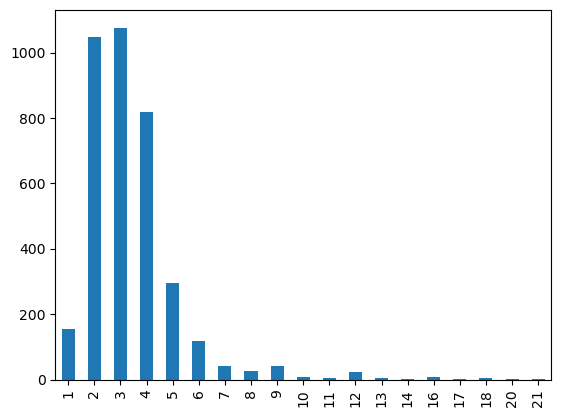

In [91]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

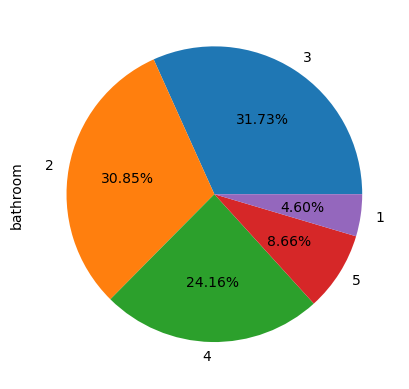

In [93]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### balcony 

In [94]:
df['balcony'].isnull().sum()

0

<Axes: >

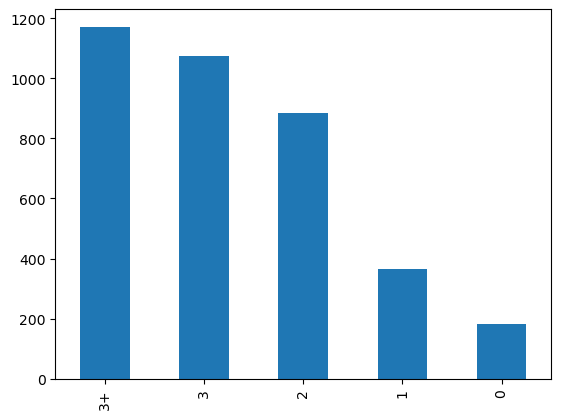

In [96]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

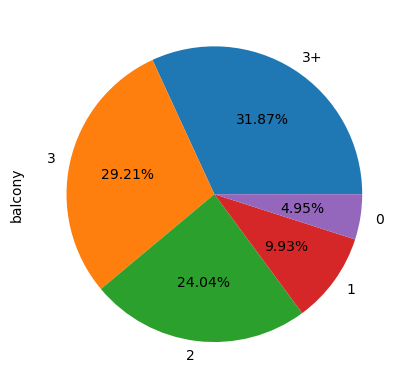

In [97]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### 

### floorNum

In [99]:
df['floorNum'].isnull().sum()

19

In [100]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

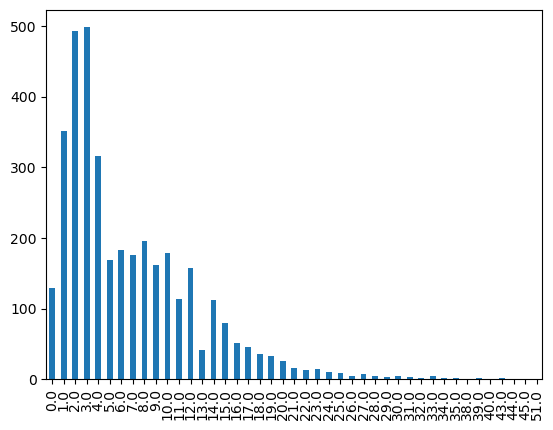

In [101]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

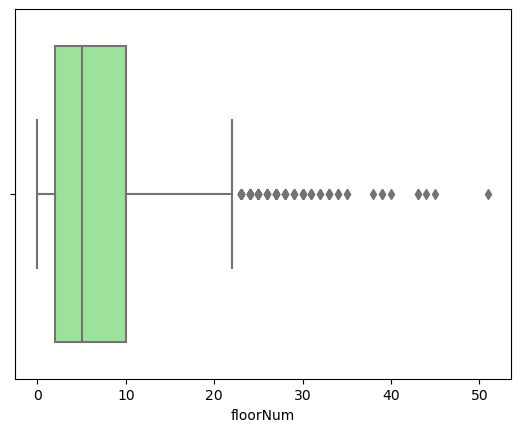

In [104]:
sns.boxplot(x=df['floorNum'] ,color='lightgreen')

* The majority of the properties lie between the ground floor (0) and the 25th floor.
* Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
* There are a few properties located at higher floors, but their frequency is much lower.
* The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
* Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing 

In [105]:
df['facing'].isnull().sum()

1045

In [124]:
df['facing'].fillna('NA',inplace=True)

In [125]:
df['facing'].value_counts()

NA            1045
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: facing, dtype: int64

### agePossession

In [131]:
df['agePossession'].isnull().sum()

0

In [132]:
df['agePossession'].value_counts()

Relatively New        1646
New Property           648
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     211
Name: agePossession, dtype: int64

### areas

In [134]:
df['super_built_up_area'].isnull().sum()

1802

In [135]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

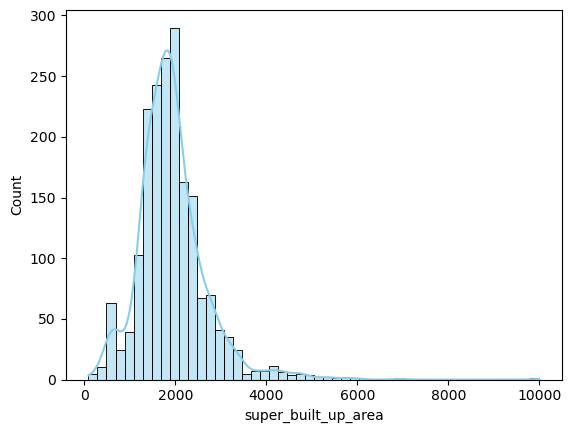

In [138]:
sns.histplot(df['super_built_up_area'].dropna(),kde=True,bins=50,color='skyblue')

<Axes: xlabel='super_built_up_area'>

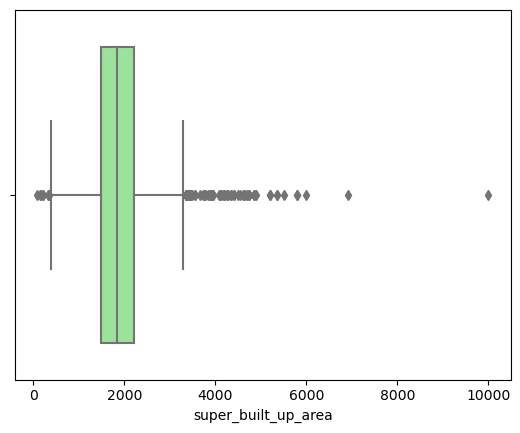

In [140]:
sns.boxplot(x=df['super_built_up_area'].dropna(),color='lightgreen')

* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

### built_up_area

In [142]:
df['built_up_area'].isnull().sum() 

1987

In [143]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

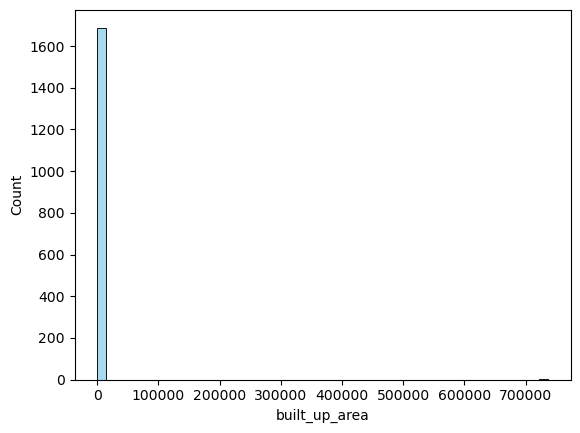

In [146]:
sns.histplot(df['built_up_area'].dropna(),bins=50,color='skyblue',kde=False)

<Axes: xlabel='built_up_area'>

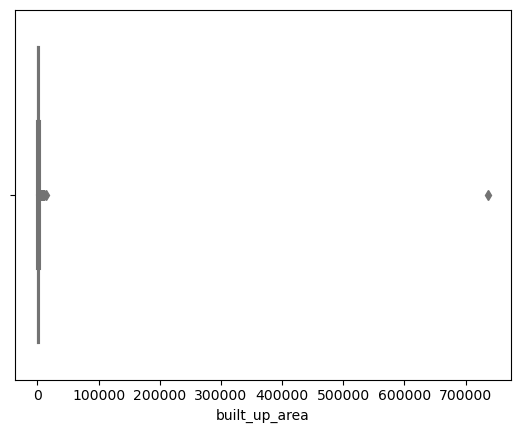

In [148]:
sns.boxplot(x=df['built_up_area'].dropna(),color='lightgreen')

* Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
* There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
* The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.
* The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed. 

In [149]:
# carpet area 

df['carpet_area'].isnull().sum()

1805

In [150]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

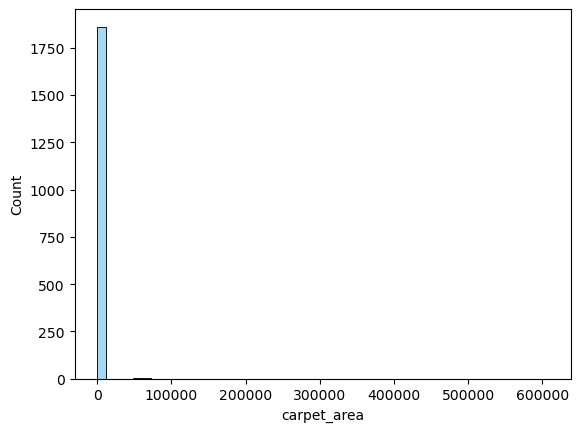

In [151]:
sns.histplot(df['carpet_area'].dropna(),bins=50,color='skyblue',kde=False)

<Axes: xlabel='carpet_area'>

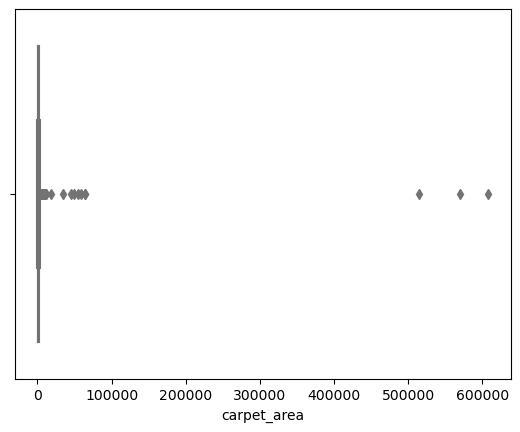

In [152]:
sns.boxplot(x=df['carpet_area'].dropna(),color='lightgreen')

In [155]:
df.iloc[:,16:]

,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,30
2,1,0,0,0,0,0,220
3,1,1,1,0,1,1,157
4,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...
3798,0,1,0,0,0,0,80
3799,1,1,0,0,0,2,172
3800,1,0,0,0,0,0,12
3801,0,1,0,0,0,0,177


### additional rooms 

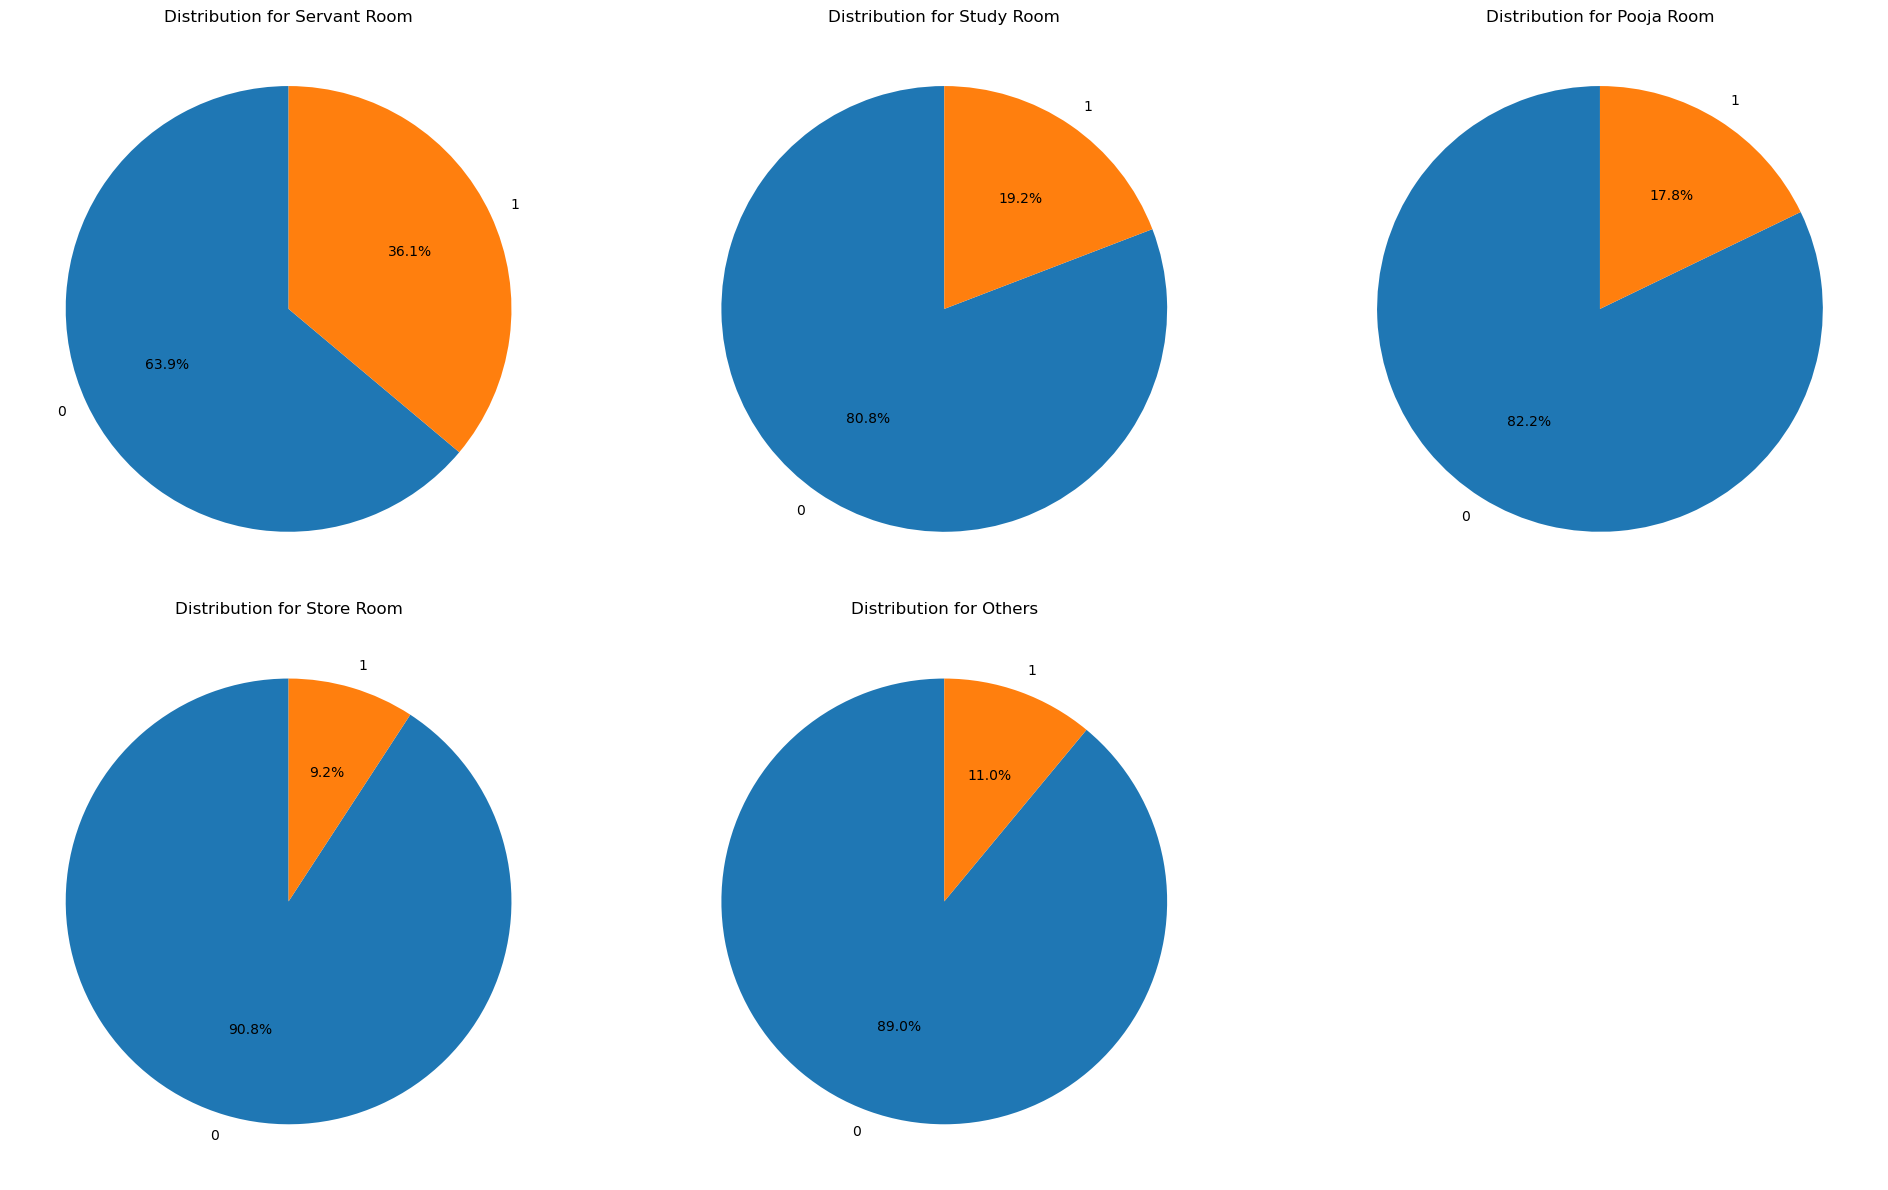

In [161]:
plt.figure(figsize=(20,12))

# create a subplot of pie charts for each room type

for idx ,room in enumerate(['servant room',	'study room',	'pooja room',	'store room',	'others'	],1):
    ax=plt.subplot(2,3,idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,ax=ax)
    plt.title(f'Distribution for {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()


### 

### furnishing_type


In [165]:
df['furnishing_type'].value_counts()


0    2414
2    1057
1     206
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

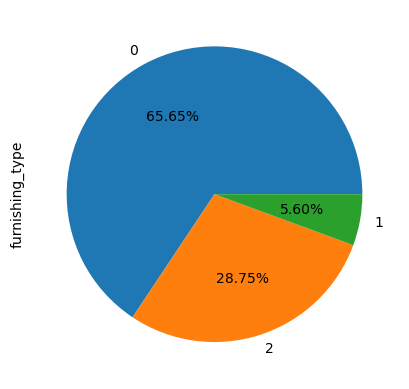

In [169]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury_score


In [170]:
df['luxury_score'].isnull().sum()

0

In [171]:
df['luxury_score'].describe()

count    3677.000000
mean       90.498504
std        68.045941
min         0.000000
25%        42.000000
50%        70.000000
75%       140.000000
max       228.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

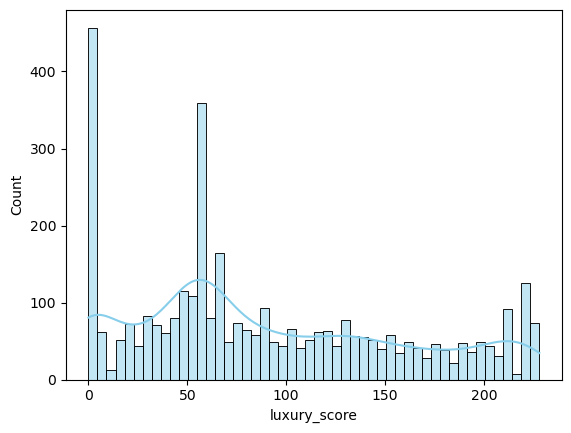

In [172]:
sns.histplot(df['luxury_score'] ,bins=50,color='skyblue',kde=True)

<Axes: xlabel='luxury_score'>

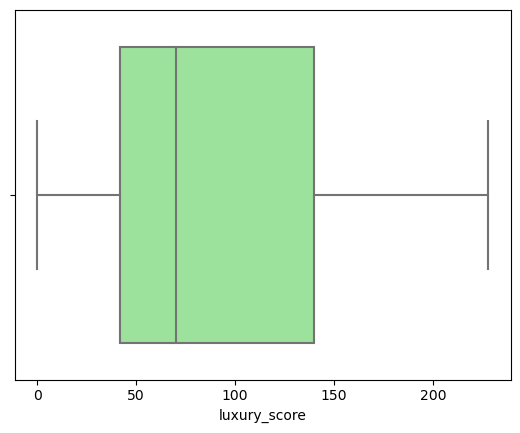

In [173]:
sns.boxplot(x=df['luxury_score'],color='lightgreen')

* The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.
* The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 140. The interquartile range (IQR) lies between these values.

In [174]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,study room,pooja room,store room,others,furnishing_type,luxury_score
0,house,independent,sector 7,0.89,18658.0,477.0,Plot area 477(44.31 sq.m.),5,3,2,...,NaN,477.0,NaN,0,0,0,0,0,0,8
1,house,independent,sector 14,5.00,22222.0,2250.0,Plot area 250(209.03 sq.m.),3,3,3,...,NaN,2250.0,NaN,0,0,0,0,0,0,30
2,flat,la vida by tata housing,sector 113,2.78,10334.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3,4,3+,...,2690.0,2350.0,2170.0,1,0,0,0,0,0,220
3,house,independent,sector 25,NaN,NaN,NaN,Plot area 250(209.03 sq.m.)Built Up area: 260 ...,12,12,3+,...,NaN,260.0,245.0,1,1,1,0,1,1,157
4,house,dlf city plots phase 3,sector 24,1.44,26667.0,540.0,Plot area 60(50.17 sq.m.),4,2,2,...,NaN,540.0,NaN,0,0,0,0,0,0,8
